#  Unit 2.4b Using Programs with Data, SQL
> Using Programs with Data is focused on SQL and database actions.  Part B focuses on learning SQL commands, connections, and curses using an Imperative programming style,
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

# Database Programming is Program with Data
> Each Tri 2 Final Project should be an example of a Program with Data. 

>  Prepare to use SQLite in common Imperative Technique
- Explore [SQLite Connect object](https://www.tutorialspoint.com/python_data_access/python_sqlite_establishing_connection.htm) to establish database connection
- Explore [SQLite Cursor Object](https://www.tutorialspoint.com/python_data_access/python_sqlite_cursor_object.htm) to fetch data from a table within a database


## Schema of Users table in Sqlite.db
> Uses PRAGMA statement to read schema.

Describe Schema, here is resource [Resource](https://www.sqlite.org/index.html)
- What is a database schema?
  - Database schema are the constraints placed on the data that is going to be inputted in to the sqlite database.
- What is the purpose of identity Column in SQL database?
  - The purpose of the ID column is to differentiate each user from one another. This is because each individual user is unique in terms of ID, thus they can be differed.
- What is the purpose of a primary key in SQL database?
  - The purpose of the primary key is similar to the identity column, it is to differ each user from one another, allowing code to affect the intended object.
- What are the Data Types in SQL table?
  - Some data types in an SQL table are floats, integers, strings, dates, etc. 

In [4]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)  #connection to db

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor() # executes queries
    
    # Fetch results of Schema
    # query to DB
    results = cursor.execute("PRAGMA table_info('users')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close() # prevents data leaks
    
schema() # run fnction


(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 1, None, 0)
(2, '_uid', 'VARCHAR(255)', 1, None, 0)
(3, '_password', 'VARCHAR(255)', 1, None, 0)
(4, '_dob', 'DATE', 0, None, 0)


## Reading Users table in Sqlite.db
> Uses SQL SELECT statement to read data

- What is a connection object?  After you google it, what do you think it does?
  - The connection object is the connection to the database. I think it provides a reference to a database in a different area, allowing the user to manipulate the table
- Same for cursor object?
  - Cursors are probably a cursor to a sqlite terminal like object, allowing you to execute specific commands to the database, allowing for usage within the table. Both of these need to be closed to not leak data. 
- Look at conn object and cursor object in VSCode debugger.  What attributes are in the object?
  - Conn and cursor have function and class variables, each which are initialized when the cursor itself is initialized. Abstraction of stuff
- Is "results" an object?  How do you know?
  - Results is an object, because it appears in the debug menu. 

In [ ]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM users').fetchall()

    # * unpacks everything, returning everything
    
    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read() # runs functions


## Create a new User in table in Sqlite.db
> Uses SQL INSERT to add row
-  Compore create() in both SQL lessons.  What is better or worse in the two implementations?
   -  the create function from an OOP paradigm must be called on the object, which is good if you are creating objects. However, an imperative paradigm results in you having to create the user every single time and hand input it. Less error prone in imperative, less efficient in create(). Does not censor password
-  Explain purpose of SQL INSERT.   Is this the same as User __init__?
   -  This inserts stuff into the table. This creates the user, like __init__.

In [12]:
import sqlite3
# creates baiyyah
def create():
    name = input("Enter your name:")
    uid = input("Enter your user id:")
    password = input("Enter your password")
    dob = input("Enter your date of birth 'YYYY-MM-DD'")
    # gets data
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO users (_name, _uid, _password, _dob) VALUES (?, ?, ?, ?)", (name, uid, password, dob))
        
        # this is creation of a user

        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {uid} has been created")
                
    except sqlite3.Error as error: # ensures errors do not occur
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
create() # run function

A new user record  has been created


## Updating a User in table in Sqlite.db
> Uses SQL UPDATE to modify password
- What does the hacked part do?
  - The hacked portion checks in order to make sure that the password is of ample length, in order to ensure that you would not be hacked
- Explain try/except, when would except occur?
  - Except would occur when there is an error in the code, specifically if an sqlite error occurs or an error occurs when updating
- What code seems to be repeated in each of these examples to point, why is it repeated?
  - The closing of the cursor seems to be repeated, ensures that data is not leaking.

In [13]:
import sqlite3

def update():
    uid = input("Enter user id to update")
    password = input("Enter updated password")
    if len(password) < 2: # prevents bad passwords
        message = "hacked"
        password = 'gothackednewpassword123' # sets a new password (unethical? maybe ask first)
    else:
        message = "successfully updated"

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE users SET _password = ? WHERE _uid = ?", (password, uid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            print(f"The row with user id {uid} the password has been {message}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
update()


The row with user id  the password has been hacked


## Delete a User in table in Sqlite.db
> Uses a delete function to remove a user based on a user input of the id.
- Is DELETE a dangerous operation?  Why?
  - DELETE is a dangerous operation because it results in the permanent removal of data, and unless you can remember it, there's no way to purposefully remove it.
- In the print statemements, what is the "f" and what does {uid} do?
  - `f` is an `f string`, where you can place variables into a string using `{}` and have them return their string counterparts. for example:
```python
integer = 3
print(f"hello world, my number is {integer}")
```
return value: `hello world, my number is 3`

In [14]:
import sqlite3

def delete():
    uid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM users WHERE _uid = ?", (uid,))
        if cursor.rowcount == 0:
            # The uid was not found in the table 
            print(f"No uid {uid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with uid {uid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error: # checks for errors
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    # literally just deletes
delete()

The row with uid  was successfully deleted


# Menu Interface to CRUD operations
> CRUD and Schema interactions from one location by running menu. Observe input at the top of VSCode, observe output underneath code cell.
- Why does the menu repeat?
  - Repeats as a result of recursion, the function calls itself
- Could you refactor this menu?  Make it work with a List?
  - Yea, we could take multiple inputs, get multiple queries, and return every query at once. We could also check to see if the input is within a list to see if it can be selected

In [15]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c': # checks each for input
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update() 
    elif operation.lower() == 'd':
        delete() # makes sure to see if everything can be called
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
    
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


In [8]:
# Another way to check input (using lists)
def menuList():
    valid = ['c', 'r', 'u', 'd'] # lit of valid input
    inp = input("Enter a letter")

    if inp == "": # checks input
        print("nothing will happen")
    elif inp in valid: # checks if in list
        print("Input is validated! Do something!")
    else:
        print("Input invalid, enter valid input")
for i in range(3):
    menuList()

Input is validated! Do something!
Input invalid, enter valid input
nothing will happen


In [7]:
# Another way to check input (using dictionaries referencing functions)

# functions

def create():
    print('create')
def read():
    print('read')
def update():
    print('update')
def delete():
    print('delete')
def nothing():
    print("nothing to do")

def menuDic():
    valid = {'c':create, 'r':read, "u":update, 'd':delete, "":nothing} # map of letter to function

    inp = input("Enter a letter!") # gets input

    if inp in list(valid.keys()): # checks to see if it is a key in a list
        valid[inp]() # runs function (calls) from dictionary
        # can also be used to eliminate escape
    else:
        print("please enter valid input")

for i in range(3):
    # runs menu three times to test
    menuDic()


create
nothing to do
please enter valid input


# Hacks
- Add this Blog to you own Blogging site.  In the Blog add notes and observations on each code cell.
- In this implementation, do you see procedural abstraction?
  - I saw procedural abstraction through the abstracting of various components, such as the sqlite tables and the cursor to the table. These abstractions also occured in functions which abstracted functions such as creating and reading to the database
- In 2.4a or 2.4b lecture
    - Do you see data abstraction?  Complement this with Debugging example.
      - I see data abstraction in the abstraction of the table and the cursor into objects. I also saw the results abstracted into an object that was later called and we accessed this object to return data. 
    - Use Imperative or OOP style to Create a new Table or do something that applies to your CPT project.
      - See previous
    

Reference... [sqlite documentation](https://www.sqlitetutorial.net/sqlite-python/creating-tables/)


Debugging Example


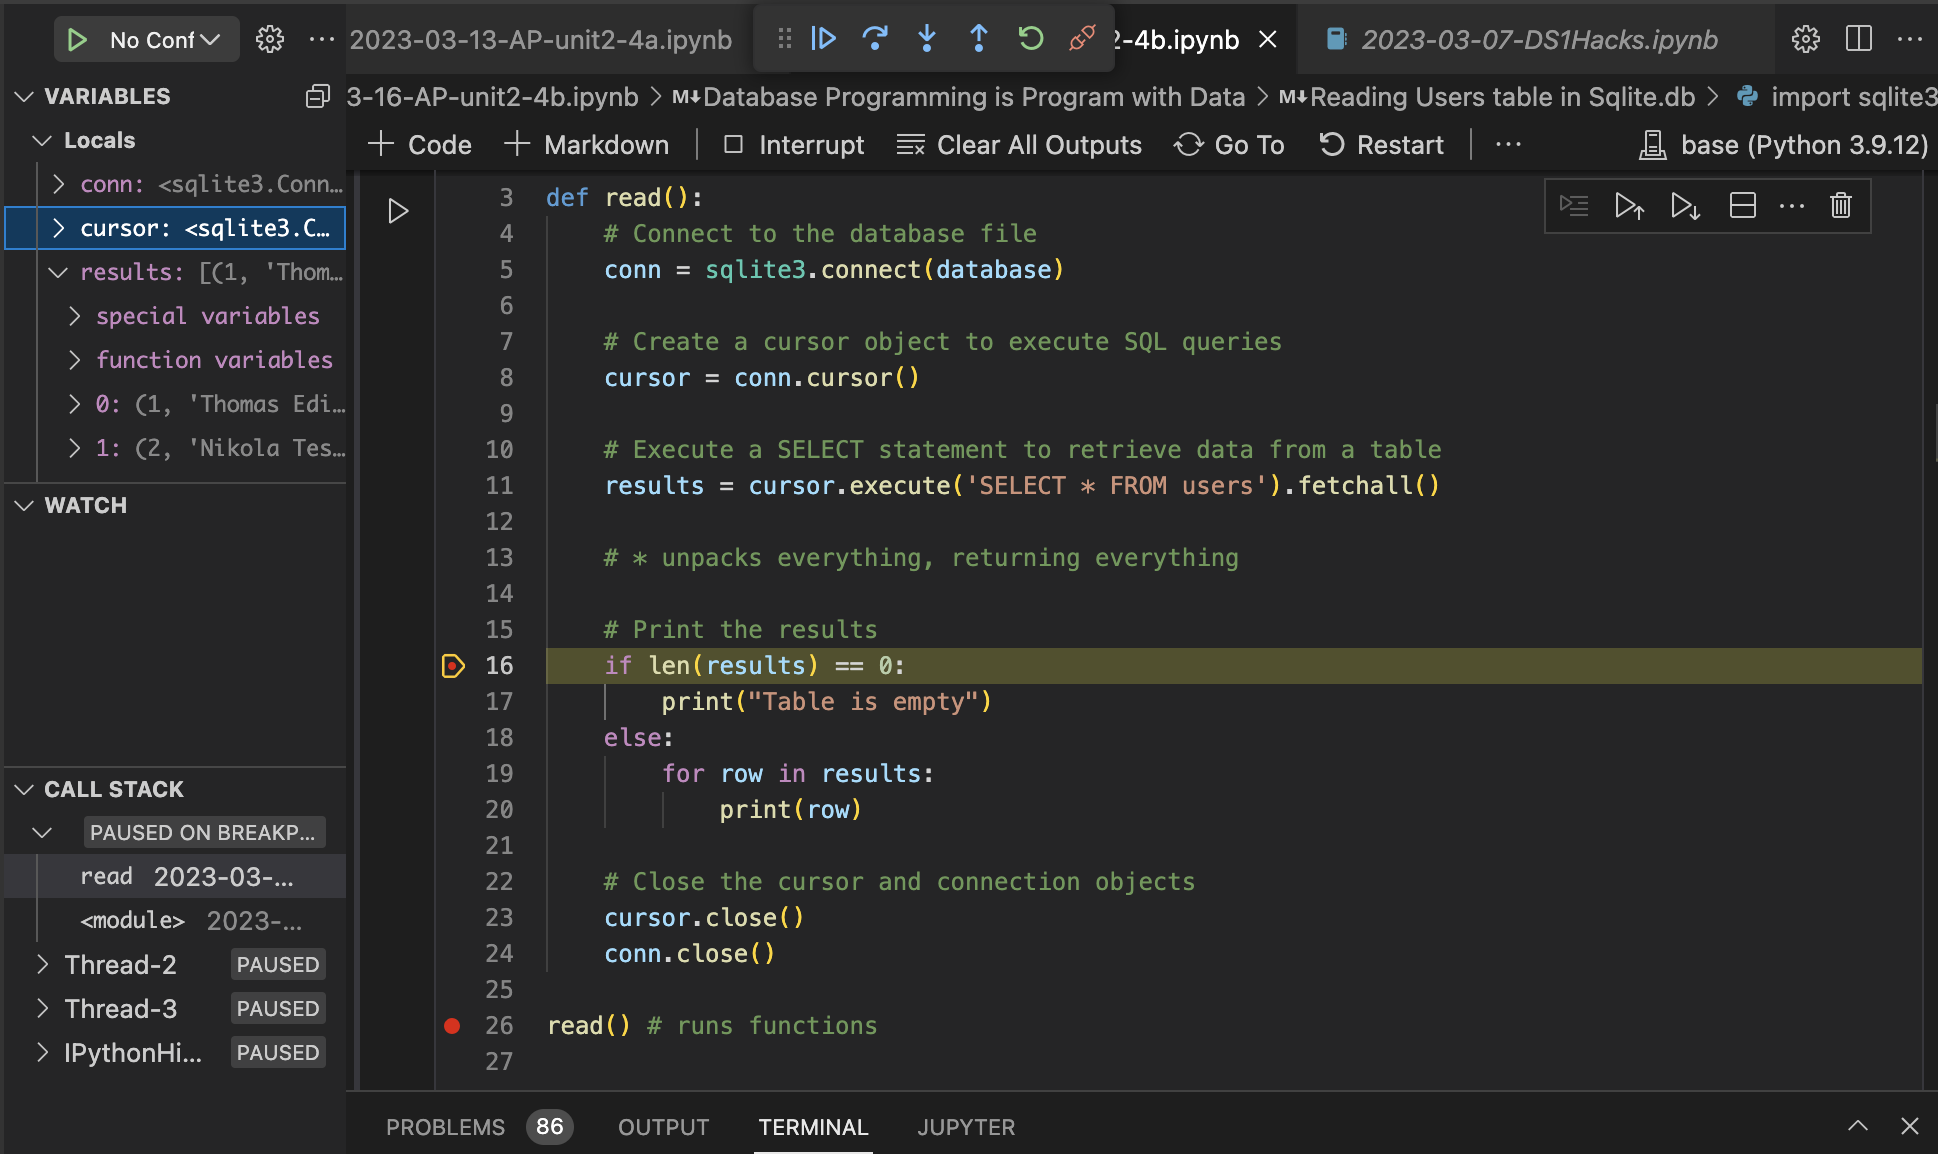

In [1]:
from PIL import Image
print("Debugging Example")
emaad = Image.open('images/debugging.png')
display(emaad)